In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("nba_logreg.csv")

In [3]:
data

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [4]:
data.describe()

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [5]:
data.isna().sum()

name            0
gp              0
min             0
pts             0
fgm             0
fga             0
fg              0
3p_made         0
3pa             0
3p             11
ftm             0
fta             0
ft              0
oreb            0
dreb            0
reb             0
ast             0
stl             0
blk             0
tov             0
target_5yrs     0
dtype: int64

3P je kolona koja sadrzi odnos broja pogodjenih trojki i pokusaja trojki i vrednost je od [0.00,1.00] , tj. od 0 do 100%. Postoje NaN vrednosti zbog deljenja nulom, jer neki igraci nemaju pokusaje trojki. Zato je najbolja opcija samo da ih popunimo nulama ili da ih potpuno odbacimo.

In [6]:
data=data.fillna(0.0)

In [7]:
data.isna().sum()

name           0
gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64

In [8]:
duplikati=data.duplicated()
data.loc[duplikati]

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
163,Charles Smith,60,8.7,2.9,1.0,2.2,44.4,0.0,0.1,0.0,...,1.3,69.7,0.2,0.9,1.2,1.7,0.6,0.1,0.6,1.0
166,Charles Smith,71,30.4,16.3,6.1,12.4,49.5,0.0,0.0,0.0,...,5.5,72.5,2.4,4.1,6.5,1.5,1.0,1.3,2.1,1.0
169,Charles Smith,34,8.6,3.5,1.4,3.7,39.2,0.4,1.4,31.9,...,0.3,54.5,0.4,0.4,0.8,0.6,0.3,0.2,0.8,1.0
243,Reggie Williams,35,24.5,10.4,4.3,12.2,35.6,0.4,1.7,22.4,...,1.9,72.7,1.6,1.8,3.4,1.7,0.8,0.6,1.8,1.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,0.0,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
366,Charles Jones,78,20.1,8.4,3.0,5.8,52.0,0.0,0.1,0.0,...,3.6,64.8,1.8,3.3,5.1,1.6,0.6,0.8,1.8,0.0
369,Charles Jones,29,16.4,3.7,1.3,4.2,31.7,0.7,2.1,31.1,...,0.8,50.0,0.3,1.1,1.4,1.4,0.6,0.2,1.0,0.0
504,Eddie Johnson,74,20.5,9.3,4.0,8.7,45.9,0.0,0.1,9.1,...,2.0,66.4,1.7,2.6,4.4,1.5,0.7,0.2,1.3,1.0
733,Gerald Henderson,43,8.3,2.6,0.9,2.4,35.6,0.1,0.4,21.1,...,1.1,74.5,0.3,0.9,1.3,0.3,0.2,0.2,0.3,1.0
824,Marcus Williams,79,16.6,6.8,2.6,6.7,39.5,0.6,2.1,28.2,...,1.1,84.7,0.4,1.7,2.1,3.3,0.4,0.0,1.8,0.0


Postoji 12 redova koji su cisti duplikati i koje cemo odbaciti posto nam nikako ne pomazu.

In [9]:
data=data.drop_duplicates()

In [10]:
duplikati=data.duplicated()
data.loc[duplikati]

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs


In [11]:
data.describe()

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.00000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,60.411145,17.634413,6.804217,2.630271,5.885542,44.184639,0.247741,0.77869,19.177485,1.298117,1.822139,70.325226,1.009714,2.027636,3.036446,1.551205,0.619051,0.368675,1.193599,0.620482
std,17.416688,8.322560,4.361669,1.684918,3.595394,6.132759,0.384548,1.06351,16.071943,0.987329,1.322653,10.562158,0.777551,1.362236,2.060241,1.475731,0.410972,0.429680,0.723966,0.485450
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.00000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.30000,22.200000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.12500,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.50000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


Jako je niska verovatnoca da je neko u svojoj prvoj godini u NBA-ju pogodio svaku trojku ili da je pogodio svako slobodno bacanje u citavoj godini, pa cemo zato da ih izdvojimo.

In [12]:
data.loc[(data['3p'] == 100.00) | (data['ft']==100.00)]

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
45,Pete Chilcutt,69,11.8,3.6,1.6,3.6,45.2,0.0,0.0,100.0,...,0.4,82.1,1.1,1.6,2.7,0.6,0.5,0.3,0.6,1.0
609,Darius Miller,52,13.3,2.3,0.8,2.1,40.7,0.4,1.1,39.3,...,0.2,100.0,0.2,1.3,1.5,0.8,0.3,0.2,0.4,0.0
625,Jeremy Lamb,23,6.4,3.1,1.0,3.0,35.3,0.4,1.3,30.0,...,0.6,100.0,0.2,0.6,0.8,0.2,0.1,0.1,0.3,1.0
663,E'Twaun Moore,38,8.7,2.9,1.1,3.0,38.1,0.4,1.2,37.8,...,0.2,100.0,0.1,0.8,0.9,0.9,0.3,0.1,0.6,1.0
851,Steve Novak,35,5.5,1.5,0.5,1.4,36.0,0.4,1.1,33.3,...,0.1,100.0,0.1,0.6,0.7,0.2,0.1,0.0,0.1,1.0
1053,Mark Madsen,70,9.2,2.0,0.8,1.6,48.7,0.0,0.0,100.0,...,0.5,70.3,1.1,1.1,2.2,0.3,0.1,0.1,0.4,1.0
1108,Bryce Drew,34,13.0,3.5,1.4,3.8,36.4,0.5,1.4,32.7,...,0.2,100.0,0.1,0.9,0.9,1.5,0.3,0.1,0.9,1.0
1174,Erick Dampier,72,14.6,5.1,1.8,4.7,39.0,0.0,0.0,100.0,...,2.3,63.7,1.3,2.8,4.1,0.6,0.3,1.0,1.2,1.0
1253,Eric Mobley,46,12.8,3.9,1.7,2.9,59.1,0.0,0.0,100.0,...,1.0,48.9,1.2,2.1,3.3,0.5,0.2,0.6,0.5,0.0


Ocigledno postoje neke greske sa podacima posto za isti broj pokusaja i ubacenih trojki, tj. u ovom slucaju 0, nekim igracima stoji 100% a drugim 0%.

In [13]:
data.loc[(data['ft']==100.00),['ftm','fta','ft']]

,ftm,fta,ft
609,0.2,0.2,100.0
625,0.6,0.6,100.0
663,0.2,0.2,100.0
851,0.1,0.1,100.0
1108,0.2,0.2,100.0


Iz podataka ne mozemo da zakljucimo da je doslo do greske

In [14]:
data

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [15]:
imenjaci=data.duplicated(subset=['name','gp','min','pts'],keep=False)
imenjaci1=data.loc[imenjaci]

In [41]:
statistika=data.describe()
statistika=statistika.drop('target_5yrs',axis=1)
mean=statistika.loc['mean']
def izbaci_netacne (red):
    red1=red
    red1=red1.drop('target_5yrs')
    red1=red1.drop('name')
    try:
        imenjaci1.loc[red]
        if red1.ge(mean).value_counts()[True] > 7 :
            #data.loc[(data.name == red.name) & (data.gp == red.gp) & (data.min == red.min) & (data.pts == red.pts) & (data.target_5yrs==0.0)].drop(inplace=True)
            if(red.target_5yrs==0.0):
                red.drop(inplace=True)
            imenjaci1.loc[red].drop(inplace=True)
        else :
            #data.loc[(data.name == red.name) & (data.gp == red.gp) & (data.min == red.min)& (data.pts == red.pts) & (data.target_5yrs==1.0)].drop(inplace=True)
            if(red.target_5yrs==1.0):
                red.drop(inplace=True)
            imenjaci1.loc[red].drop(inplace=True)
    except KeyError:
        pass

nova_verzija=data.apply(lambda red : izbaci_netacne(red),axis=1)

In [17]:
data

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [18]:
nova_verzija

0       None
1       None
2       None
3       None
4       None
        ... 
1334    None
1336    None
1337    None
1338    None
1339    None
Length: 1328, dtype: object

In [19]:
imenjaci1

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
18,Larry Johnson,82,37.2,19.2,7.5,15.3,49.0,0.1,0.3,22.7,...,5.0,82.9,3.9,7.0,11.0,3.6,1.0,0.6,1.9,0.0
19,Larry Johnson,82,37.2,19.2,7.5,15.3,49.0,0.1,0.3,22.7,...,5.0,82.9,3.9,7.0,11.0,3.6,1.0,0.6,1.9,1.0
71,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,...,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,0.0
72,Dee Brown,82,23.7,8.7,3.5,7.5,46.4,0.1,0.4,20.6,...,1.9,87.3,0.5,1.7,2.2,4.2,1.0,0.2,1.7,1.0
73,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,...,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,0.0
74,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,...,0.8,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,1.0
120,Tim Hardaway,79,33.7,14.7,5.9,12.5,47.1,0.3,1.1,27.4,...,3.5,76.4,0.7,3.2,3.9,8.7,2.1,0.1,3.3,0.0
121,Tim Hardaway,79,33.7,14.7,5.9,12.5,47.1,0.3,1.1,27.4,...,3.5,76.4,0.7,3.2,3.9,8.7,2.1,0.1,3.3,1.0
126,Glen Rice,77,30.0,13.6,6.1,13.9,43.9,0.2,0.9,24.6,...,1.6,73.4,1.3,3.3,4.6,1.8,0.9,0.3,1.5,1.0
127,Glen Rice,77,30.0,13.6,6.1,13.9,43.9,0.2,0.9,24.6,...,1.6,73.4,1.3,3.3,4.6,1.8,0.9,0.3,1.5,0.0


Postoje duplikati u bazi za koje ne znam kako su mogli da nastanu osim greskom. Ne vidim poentu da se istom igracu dodeli vrednost i 0 i 1 za mogucnost karijere od minimum 5 godina. Neki od ovih duplikata jesu igraci sa istim imenom i prezimenom, ali cak i oni imaju isti problem.

In [20]:
def plot_hist(X, title,label):
  plt.title(title)
  X.hist(bins=45)
  plt.xlabel(label)

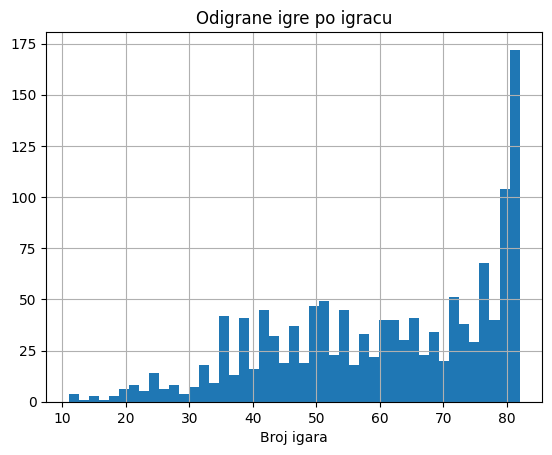

In [21]:
plot_hist(data['gp'],'Odigrane igre po igracu','Broj igara')

Jedna NBA sezona se sastoji od 82 utakmice!

In [22]:
data['gp'].describe()

count    1328.000000
mean       60.411145
std        17.416688
min        11.000000
25%        47.000000
50%        63.000000
75%        77.000000
max        82.000000
Name: gp, dtype: float64

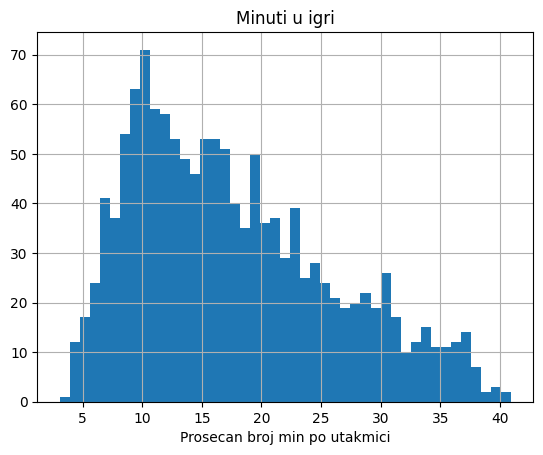

In [23]:
plot_hist(data['min'],'Minuti u igri','Prosecan broj min po utakmici')

Jedna utakmica traje 40 minuta ali postoje produzetci, tako da prosek moze da ode preko 40!

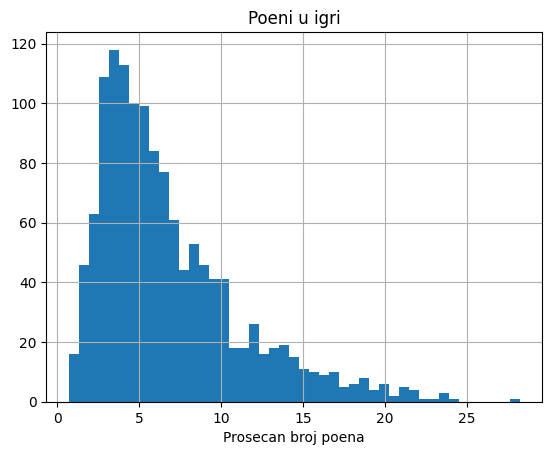

In [24]:
plot_hist(data['pts'],'Poeni u igri','Prosecan broj poena')

In [25]:
data['pts'].describe()

count    1328.000000
mean        6.804217
std         4.361669
min         0.700000
25%         3.700000
50%         5.550000
75%         8.800000
max        28.200000
Name: pts, dtype: float64

In [26]:
data.loc[(data['pts']==28.20000)]

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
352,Michael Jordan*,82,38.3,28.2,10.2,19.8,51.5,0.1,0.6,17.3,...,9.1,84.5,2.0,4.5,6.5,5.9,2.4,0.8,3.5,1.0


Michael Jordan mozda jeste statisticki outlier ali sve sto je on postigao je realno.

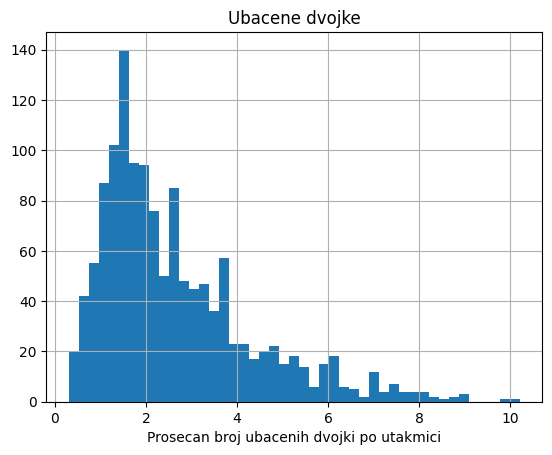

In [27]:
plot_hist(data['fgm'],'Ubacene dvojke','Prosecan broj ubacenih dvojki po utakmici')

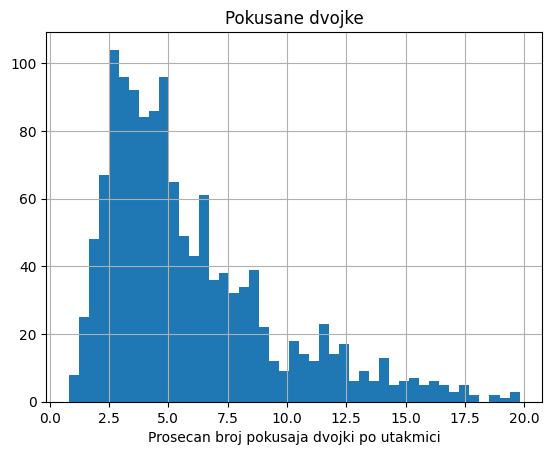

In [28]:
plot_hist(data['fga'],'Pokusane dvojke','Prosecan broj pokusaja dvojki po utakmici')

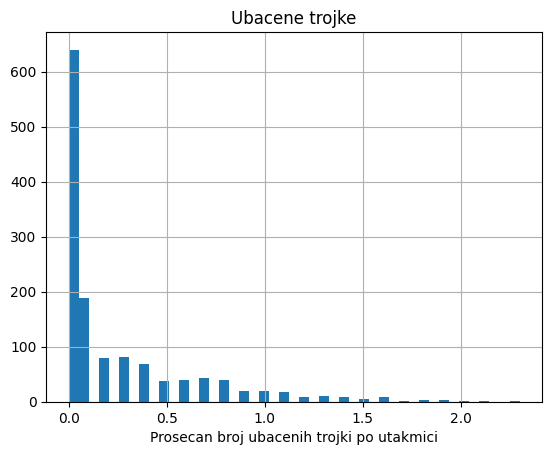

In [29]:
plot_hist(data['3p_made'],'Ubacene trojke','Prosecan broj ubacenih trojki po utakmici')

In [30]:
data['3p_made'].describe()

count    1328.000000
mean        0.247741
std         0.384548
min         0.000000
25%         0.000000
50%         0.100000
75%         0.400000
max         2.300000
Name: 3p_made, dtype: float64

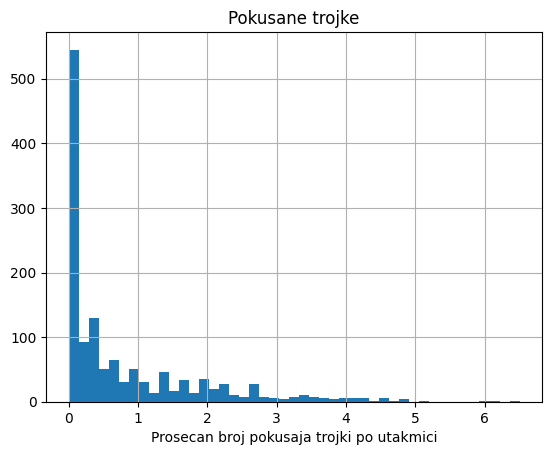

In [31]:
plot_hist(data['3pa'],'Pokusane trojke','Prosecan broj pokusaja trojki po utakmici')

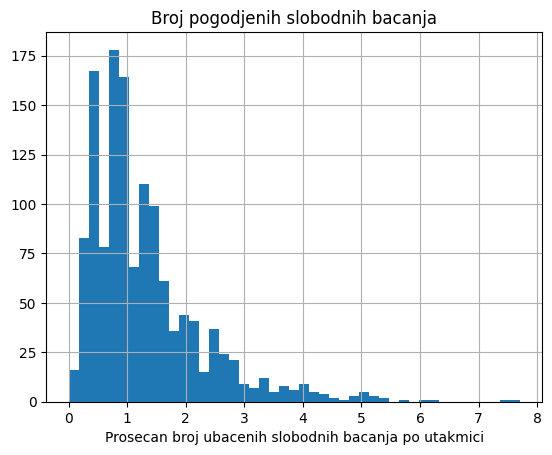

In [32]:
plot_hist(data['ftm'],'Broj pogodjenih slobodnih bacanja','Prosecan broj ubacenih slobodnih bacanja po utakmici')

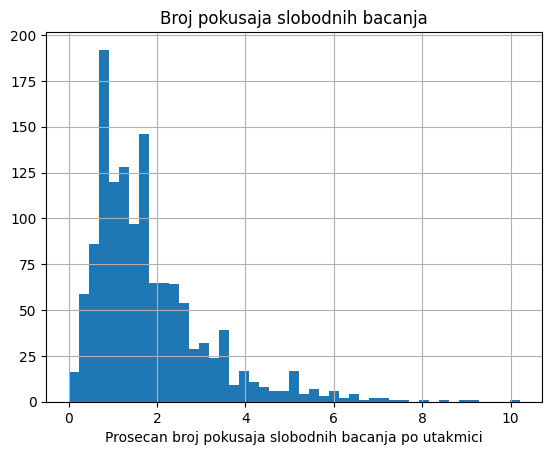

In [33]:
plot_hist(data['fta'],'Broj pokusaja slobodnih bacanja','Prosecan broj pokusaja slobodnih bacanja po utakmici')

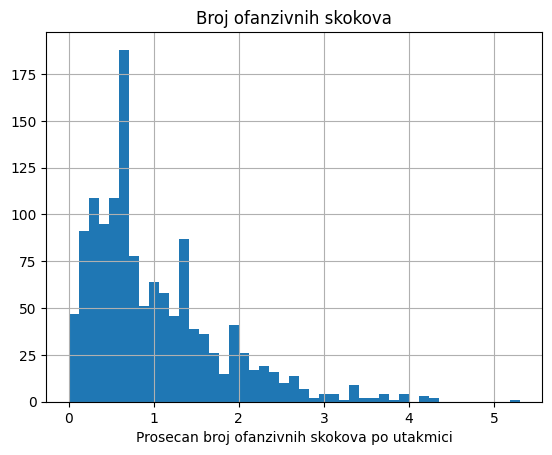

In [34]:
plot_hist(data['oreb'],'Broj ofanzivnih skokova','Prosecan broj ofanzivnih skokova po utakmici')

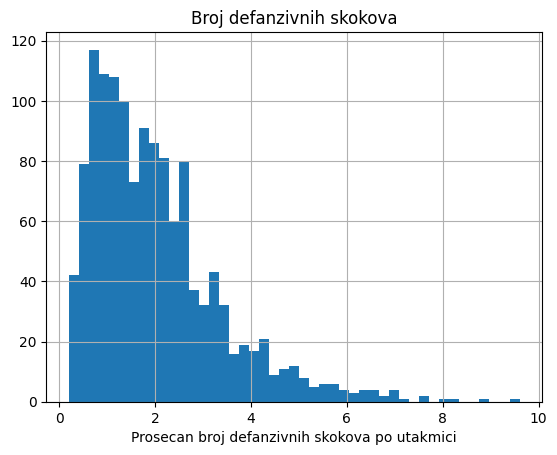

In [35]:
plot_hist(data['dreb'],'Broj defanzivnih skokova','Prosecan broj defanzivnih skokova po utakmici')

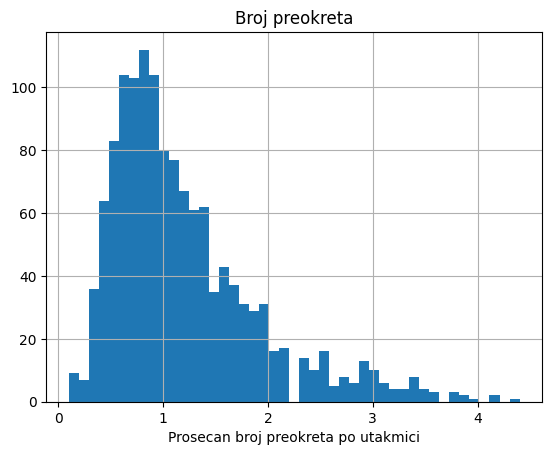

In [36]:
plot_hist(data['tov'],'Broj preokreta','Prosecan broj preokreta po utakmici')

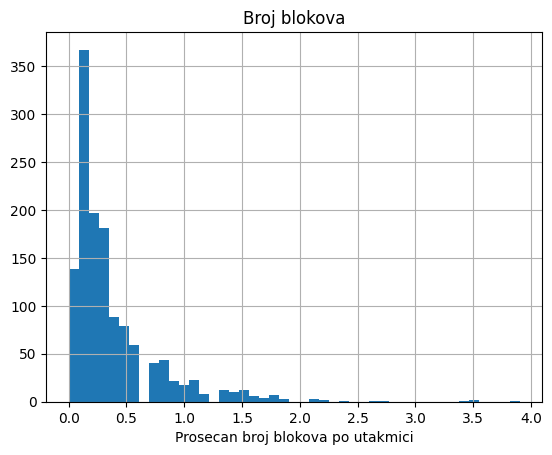

In [37]:
plot_hist(data['blk'],'Broj blokova','Prosecan broj blokova po utakmici')

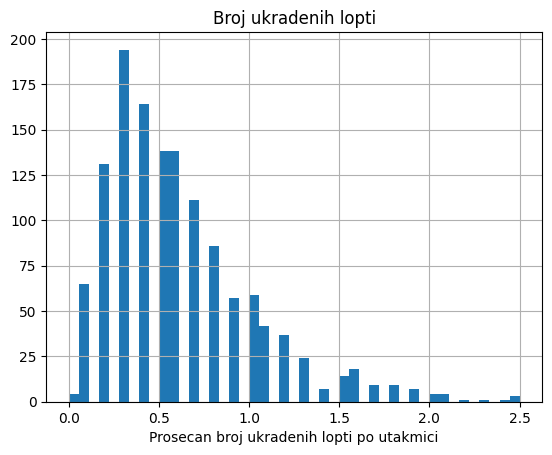

In [38]:
plot_hist(data['stl'],'Broj ukradenih lopti','Prosecan broj ukradenih lopti po utakmici')

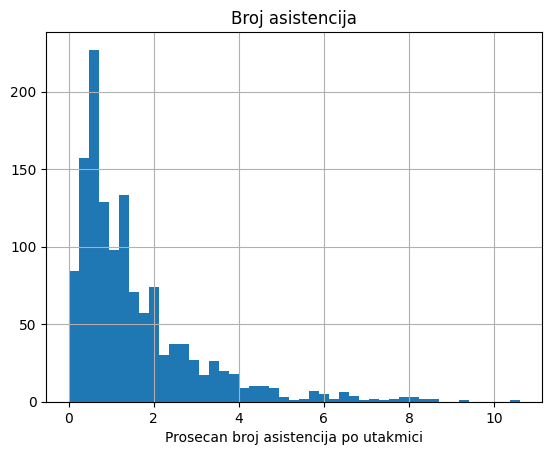

In [39]:
plot_hist(data['ast'],'Broj asistencija','Prosecan broj asistencija po utakmici')